<a href="https://colab.research.google.com/github/amrittmishra/Amrit/blob/main/Yolov11_indianroads_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Ultralytics YOLO and supervision (for visualization)
%pip install ultralytics supervision "ultralytics<=8.3.40"
import ultralytics
ultralytics.checks()

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.2/107.7 GB disk)


In [ ]:
%pip install roboflow
from roboflow import Roboflow

# Replace with your actual Roboflow API key
API_KEY = "4SjP1xi52zAJqHKsySqE"
PROJECT = "yolo-v8-indian-roads-dataset-fdkct"
WORKSPACE = "multi-object-tracking"
VERSION = "1" # Change as needed

rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT)
version = project.version(VERSION)

# Download dataset in YOLOv11 format
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Yolo-V8-Indian-roads-dataset-1 in yolov11:: 100%|██████████| 2102/2102 [00:03<00:00, 623.22it/s] 


In [ ]:
# Open and review data.yaml
yaml_path = f"{dataset.location}/data.yaml"
with open(yaml_path) as f:
    print(f.read())

# If you need to edit the YAML file:
data_yaml_content = """
train: ../train/images
val: ../valid/images
test: ../test/images
nc: 2
names: ["Bus", "Animal"]
"""

with open(yaml_path, "w") as f:
    f.write(data_yaml_content)



train: ../train/images
val: ../valid/images
test: ../test/images

nc: 11
names: ['2', 'Animal', 'Auto', 'Bus', 'Car', 'Carts', 'Person', 'Rikshaw', 'Truck', 'Two-wheeler', 'person']

roboflow:
  workspace: multi-object-tracking
  project: yolo-v8-indian-roads-dataset-fdkct
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/multi-object-tracking/yolo-v8-indian-roads-dataset-fdkct/dataset/1


In [ ]:
import os

label_dir = os.path.join(dataset.location, "train/labels")

if not os.path.exists(label_dir):
    raise FileNotFoundError(f"Labels directory not found: {label_dir}")

for label_file in os.listdir(label_dir):
    path = os.path.join(label_dir, label_file)
    with open(path) as f:
        lines = f.readlines()

    with open(path, "w") as f:
        for line in lines:
            label_idx = int(line.split()[0])
            if label_idx in [0, 1]:  # Keep only Bus and Animal
                f.write(line)


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11s.pt")  # 's' stands for "Small", good for limited datasets/compute


100%|██████████| 18.4M/18.4M [00:00<00:00, 121MB/s] 


In [ ]:
model.train(
    data=f"{dataset.location}/data.yaml",   # Path to your custom config
    epochs=10,                              # Change as needed
    imgsz=200,                              # Adjust if you have smaller images
    batch=4,                               # Adjust based on your VRAM
    project="bus-animal",
    name="yolov11s-custom"
)

New https://pypi.org/project/ultralytics/8.3.176 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Yolo-V8-Indian-roads-dataset-1/data.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=bus-animal, name=yolov11s-custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/Yolo-V8-Indian-roads-dataset-1/train/labels... 728 images, 581 backgrounds, 0 corrupt: 100%|██████████| 728/728 [00:00<00:00, 2210.31it/s]

train: New cache created: /content/Yolo-V8-Indian-roads-dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Yolo-V8-Indian-roads-dataset-1/valid/labels... 217 images, 0 backgrounds, 178 corrupt: 100%|██████████| 217/217 [00:00<00:00, 2896.45it/s]

val: WARNING ⚠️ /content/Yolo-V8-Indian-roads-dataset-1/valid/images/01e9c365f0b6dabef9556012a1ff9a4e_jpg.rf.5d7f96a67d7dc3c30ed7e1e90c7327d2.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/Yolo-V8-Indian-roads-dataset-1/valid/images/060c238aea70d9e91cb1704846262dc0_jpg.rf.3c34c7f31484e98d14e59e1194b7ea51.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/Yolo-V8-Indian-roads-dataset-1/valid/images/067a7384541eb7ce1e2b812eb61f71e2_jpg.rf.1ee0c03c1196008be2bf5d832f62f9a4.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/Yolo-V8-Indian-roads-dataset-1/valid/images/07294bfa05cb6d9ac6b03ef79048d319_jpg.rf.99af22ce5f76236baf3517f8c962971e.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 2. Possible class labels 

Plotting labels to bus-animal/yolov11s-custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to bus-animal/yolov11s-custom
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Argument(s) 'quality_lower' are not valid for transform ImageCompression
       1/10         0G     0.7074      4.689     0.7749          1        224: 100%|██████████| 182/182 [04:01<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all         39         43      0.488       0.58      0.481      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9771      2.147     0.9585          0        224: 100%|██████████| 182/182 [03:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all         39         43       0.28      0.413      0.338      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.262      2.119      1.193          1        224: 100%|██████████| 182/182 [03:46<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all         39         43      0.441      0.445      0.398      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.14      1.962      1.075          1        224: 100%|██████████| 182/182 [03:54<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all         39         43      0.341      0.208      0.317      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.107      1.844      1.072          3        224: 100%|██████████| 182/182 [03:42<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all         39         43      0.388      0.489      0.465      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.062      1.688      1.002          0        224: 100%|██████████| 182/182 [03:47<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         39         43      0.509      0.528       0.48      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.032      1.605     0.9987          0        224: 100%|██████████| 182/182 [03:45<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         39         43      0.583      0.538      0.594      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       1.03      1.557      1.032          2        224: 100%|██████████| 182/182 [03:47<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all         39         43      0.504      0.648      0.655      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9442      1.331     0.9451          0        224: 100%|██████████| 182/182 [03:46<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all         39         43      0.559      0.657      0.673      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      0.867      1.169     0.8897          2        224: 100%|██████████| 182/182 [03:49<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all         39         43      0.557      0.749      0.729      0.499



10 epochs completed in 0.654 hours.
Optimizer stripped from bus-animal/yolov11s-custom/weights/last.pt, 19.1MB
Optimizer stripped from bus-animal/yolov11s-custom/weights/best.pt, 19.1MB

Validating bus-animal/yolov11s-custom/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


                   all         39         43      0.557      0.749       0.73        0.5
                   Bus         20         21      0.612      0.857      0.854       0.62
              "Animal"         19         22      0.502      0.642      0.606       0.38
Speed: 0.3ms preprocess, 75.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to bus-animal/yolov11s-custom


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7ed433ae10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.25,
    imgsz=224,      # Ensure multiple of 32
    save=False,     # Do not save images with drawn boxes
    save_txt=True   # Save predicted boxes as text files
)



image 1/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/00000166_jpg.rf.8090c6fc031c872771efddf7763dec83.jpg: 160x224 1  "Animal", 77.5ms
image 2/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/13_png.rf.b14b7fde267157aed21900ae64e728ab.jpg: 224x224 (no detections), 108.8ms
image 3/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/164_png.rf.0549d61537d910a9d4609f6fe6fa8f3f.jpg: 192x224 (no detections), 86.4ms
image 4/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/179_png.rf.8479713a9f8c301b7086996d320710e7.jpg: 224x224 (no detections), 99.3ms
image 5/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/18car_jpg.rf.faf195c944102ff52e688fa1a8b413cd.jpg: 224x224 2 Buss, 98.3ms
image 6/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/20220815_19_17_35_502_000_nNovHPpHmHgQvkzfItJqA00AOFC2_T_4160_3120-1-_jpg.rf.ea1279888a6ffba4f650f90f65731d76.jpg: 224x192 (no detections), 97.6ms
image 7/100 /content/Yolo-V8-Indian-roads-dataset-1/test/images/20220

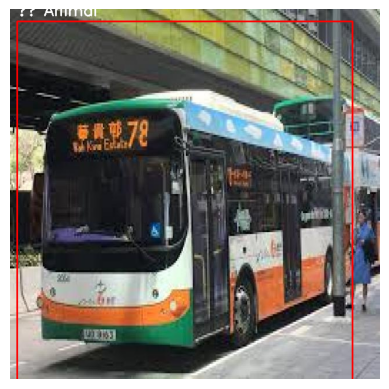

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Load one test image
img_path = f"{dataset.location}/test/images/BUS_67_jpeg_jpg.rf.92d89ffca5a0f03517a074acf9e3fe6a.jpg"  # replace with actual image file
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Suppose you have prediction boxes in results[0].boxes or saved txt files
# Example: boxes_xyxy = results[0].boxes.xyxy.cpu().numpy()
# classes = results[0].boxes.cls.cpu().numpy()

# Draw box function
def draw_boxes(image, boxes, classes, names):
    for box, cls in zip(boxes, classes):
        x1, y1, x2, y2 = map(int, box)
        label = names[int(cls)]
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
    return image

# Example usage if you have results to extract boxes and classes
boxes = results[0].boxes.xyxy.cpu().numpy()
classes = results[0].boxes.cls.cpu().numpy()
names = model.names

img_with_boxes = draw_boxes(img.copy(), boxes, classes, names)
#plt.imshow(img)
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()
